# Demonstration 3: Flight Initiation Distance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sisyphus.envs import FlightInitiationDistance
%matplotlib inline

## Value Iteration

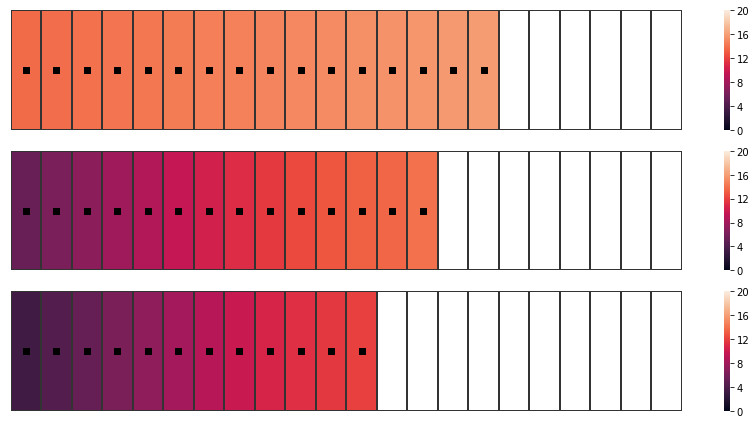

In [55]:
from sisyphus import ValueIteration

## Initialize canvas.
fig, axes = plt.subplots(3,1,figsize=(12,6))

## Initialize environment.
runway = 20
gym = FlightInitiationDistance(runway=runway, mu=15, sd=0.1, shock=-100)

for ax, beta in zip(axes, [1,0.8,0.6]):
    
    ## Perform Q-value iteration.
    qvi = ValueIteration(policy='betamax', beta=beta, gamma=0.99)
    qvi = qvi.fit(gym)
    
    ## Plot state values.   
    V = qvi.V.copy()
    V[~np.isin(gym.states, qvi.pi[:-1])] = np.nan
    sns.heatmap(V.reshape(1,-1), vmin=0, vmax=runway, xticklabels=[], yticklabels=[],
                linewidths=1, linecolor='0.2', ax=ax)
    
    ## Plot policy.
    x = np.array(qvi.pi[:-1])
    y = np.zeros_like(x)
    ax.scatter(x + 0.5,y + 0.5, marker='s', color='k')
    
plt.tight_layout()
plt.savefig('figures/03_fid.png', dpi=180)